In [52]:
import pandas as pd

df = pd.read_csv('list-of-people.csv')


# 1. Detecting Missing Data

- If more than 70-80% of column is NA, we can drop the column;
- If the NA values are in the column which is an optional in the form, that column can be decoded like the user answered (1) or not answered (0).

<AxesSubplot:>

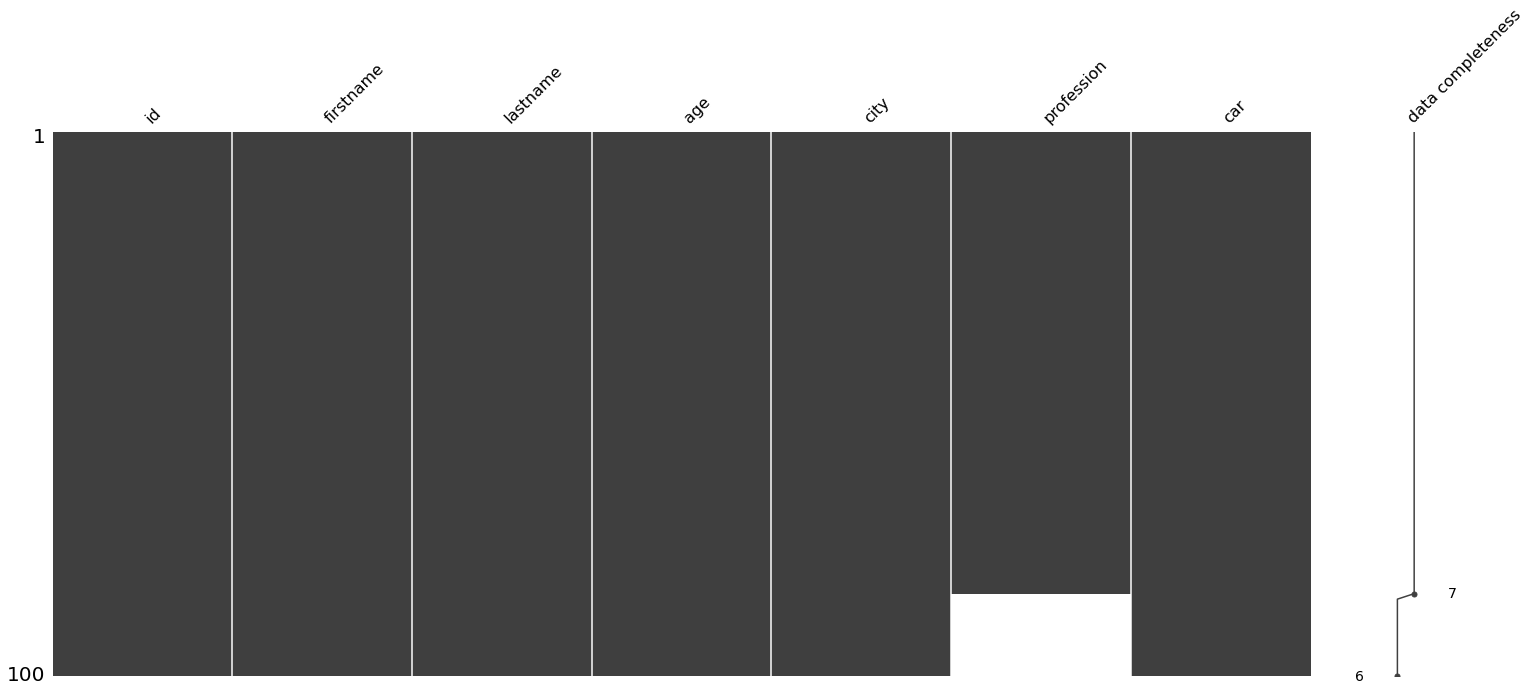

In [53]:
import missingno as msno
msno.matrix(df, labels=True, sort='descending')

# 2. Outliers

Outliers are extremely large or smal values relative to the other points of dataset. Their existence dramaticaly affects mathematical models performance.

<AxesSubplot:xlabel='age'>

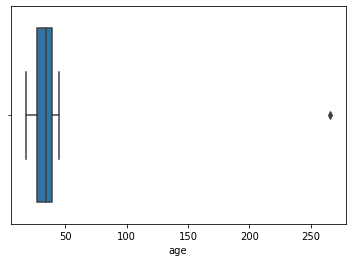

In [54]:
import seaborn as sns
sns.boxplot(x=df['age'])

This case shows the age wrongly tiped.

# 3. Inconsistent Data

Outlier problem is about numerical features. Let's talk about string columns.
Inconsistent data means that the unique classes of a column have different reprentations. 

In [55]:
df['car'] = df['car'].str.split().str[0]
df['car'].unique()

array(['alfa-romeo', 'chevrolet', 'tesla', 'ford', 'fiat', 'bmw', 'alfa',
       'peugeout', 'volkswagen', 'peugeot', 'vw', 'subaru'], dtype=object)

Here: alfa-romeo - alfa, volkswagen - vw, peugeot - peugeout.

In [56]:
df.loc[df['car'] == 'alfa', 'car'] = 'alfa-romeo'
df.loc[df['car'] == 'vw', 'car'] = 'volkswagen'
df.loc[df['car'] == 'peugeout', 'car'] = 'peugeot'

# 4. Invalid Data

This category contains the values which are simply not logically correct.

In [57]:
df.describe()

,id,age
count,100.000000,100.000000
mean,50.000000,35.270000
std,28.612705,24.564019
min,1.000000,18.000000
25%,25.750000,26.750000
50%,49.500000,34.000000
75%,74.250000,39.250000
max,100.000000,266.000000


There can be two kind of reasons leading to invalid data:

1 - Data collection errors
The data engineer can type 1799 instead of 179 for height column. This kind of random mistakes can be taken as null value and imputed alongside other NAs.

2 -  Data manipulation errors

Some columns of dataset can be output of functions coded by developers. For example, a function calculates age from birthdate and answers are negative. It means the equation is incorrect.

# 5. Duplicate Data

When there are identical rows in the dataset, it is duplicate data problem. It can happen because of data combination mistake (same row coming from multiple sources), the user might submit his or her answer twice, etc. Ideal way to handle the issue is just to delete the copy rows.

In [58]:
df.loc[df.duplicated()]

,id,firstname,lastname,age,city,profession,car
97,48,Marcy,Joseph,36,Bogor,developer,peugeot


After identifying existence of duplicates, pandas __drop_duplicates()__ is drop duplicate rows:

In [59]:
df.drop_duplicates()

,id,firstname,lastname,age,city,profession,car
0,1,Marcelline,Glovsky,41,Doha,worker,alfa-romeo
1,2,Ira,Gavrila,19,Ho Chi Minh City,police officer,alfa-romeo
2,3,Aimil,Martsen,18,Nukulaelae,NaN,chevrolet
3,4,Tori,Japeth,42,Quezon City,doctor,alfa-romeo
4,5,Tami,Poll,45,Podgorica,designer,tesla
...,...,...,...,...,...,...,...
94,95,Tabbatha,Saint,35,Tbilisi,dentist,subaru
95,96,Hayley,Persse,28,Singapore,worker,alfa-romeo
96,97,Harrietta,August,36,Konya,police officer,subaru
98,99,Fernande,Dosia,23,Pelotas,police officer,ford
